## Import necessary libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Data Preprocessing / Cleaning

In [73]:
data = pd.read_csv("DC23 Prelim Round Dataset (Final).csv")
print(f"Unprocessed Data Shape: {data.shape}")
print(f"Column Names: {data.columns.tolist()}")

# Remove redundant whitespace in the Awarded Amount Column
data.rename(columns={" Awarded Amount ": "Awarded Amount"}, inplace=True)

# We want to remove the dollar sign and convert the column data to numeric data
data["Awarded Amount"] = pd.to_numeric(data["Awarded Amount"].str.replace('$', '').str.replace(',', ''), errors='coerce')
print(data["Awarded Amount"])

# Lets filter our data to data from 2017-2022
data['Date of Award (2017-2022)'] = pd.to_datetime(data['Date of Award (2017-2022)'])

# Filter the data for the date range from January 1, 2017, to December 31, 2022
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2022-12-31')
data = data[(data['Date of Award (2017-2022)'] >= start_date) & (data['Date of Award (2017-2022)'] <= end_date)]


unique_agencies = data["Agency"].unique()
unique_agencies_count = data["Agency"].nunique()


unique_suppliers = data["Supplier"].unique()
unique_suppliers_count = data["Supplier"].nunique()
print(f"Unique Agencies: {unique_agencies}\nAgency Count: {unique_agencies_count}")
print(f"Unique Suppliers: {unique_suppliers}\nSupplier Count: {unique_suppliers_count}")

data.head()

Unprocessed Data Shape: (7000, 8)
Column Names: ['S/N', 'Procurement Code', 'Procurement Type', 'Agency', 'Procurement Description', 'Date of Award (2017-2022)', 'Supplier', ' Awarded Amount ']
0        40532.0
1        16928.0
2        14183.0
3        19908.0
4        42332.0
          ...   
6995    258752.0
6996    172045.0
6997    476750.0
6998    295089.0
6999    316264.0
Name: Awarded Amount, Length: 7000, dtype: float64
Unique Agencies: ['Office of International Relations and Diplomatic Affairs'
 'Ministry of Strategic Economic Planning'
 'Agency for Cultural Preservation and Heritage'
 'Department of Public Health and Disease Control'
 'Institute for Social Justice and Equality'
 'National Institute of Scientific Advancement'
 'Department of Advanced Technological Research'
 'Office of Public Safety and Emergency Management'
 'National Commission for Space Exploration'
 'National Cybersecurity Task Force'
 'Bureau of Urban Development and Infrastructure'
 'Department of Energy

/var/folders/5d/g79h1jpx12x13pg_j59hjc180000gn/T/ipykernel_81515/2726116509.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Awarded Amount"] = pd.to_numeric(data["Awarded Amount"].str.replace('$', '').str.replace(',', ''), errors='coerce')
/var/folders/5d/g79h1jpx12x13pg_j59hjc180000gn/T/ipykernel_81515/2726116509.py:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date of Award (2017-2022)'] = pd.to_datetime(data['Date of Award (2017-2022)'])


,S/N,Procurement Code,Procurement Type,Agency,Procurement Description,Date of Award (2017-2022),Supplier,Awarded Amount
1,2,ITQ20170001,ITQ,Office of International Relations and Diplomat...,Space planning and utilization optimization st...,2017-01-01,TrueView Management,16928.0
2,3,ITQ20170002,ITQ,Ministry of Strategic Economic Planning,Health and safety compliance management and tr...,2017-05-01,CleanHarbor Facility Care,14183.0
3,4,ITQ20170003,ITQ,Agency for Cultural Preservation and Heritage,Health and safety compliance management and tr...,2017-08-01,EverPrime Property Management,19908.0
4,5,ITQ20170004,ITQ,Department of Public Health and Disease Control,Waste management and recycling program impleme...,2017-12-01,UrbanTech Management,42332.0
5,6,ITQ20170005,ITQ,Office of International Relations and Diplomat...,Emergency response and disaster recovery plann...,2017-12-01,GrandReach Facility Care,65341.0


## Data Exploration

In [74]:

# Lets try to map the agencies to suppliers that they contracted
agency_contracted_map = {}

for index, row in data.iterrows():
    agency = row['Agency']
    supplier = row['Supplier']
    
    if agency in agency_contracted_map:
        if supplier not in agency_contracted_map[agency]:
            agency_contracted_map[agency].append(supplier)
    else:
        agency_contracted_map[agency] = [supplier]

# for agency, contracted_agencies in agency_contracted_map.items():
#     print(f"Agency: {agency}")
#     print(f"Contracted Agencies: {', '.join(contracted_agencies)}")
#     print()


# Lets try to map the suppliers to the agencies that contracted them
supplier_company_map = {}

for index, row in data.iterrows():
    company = row['Agency']
    supplier = row['Supplier']
    
    if supplier in supplier_company_map:
        if company not in supplier_company_map[supplier]:
            supplier_company_map[supplier].append(company)
    else:
        supplier_company_map[supplier] = [company]

for supplier, companies in supplier_company_map.items():
    print(f"Supplier: {supplier}")
    print(f"Companies: {', '.join(companies)}\n")

Supplier: TrueView Management
Companies: Office of International Relations and Diplomatic Affairs, Agency for Cultural Preservation and Heritage, Department of Energy Conservation and Sustainability, Department of Advanced Technological Research, Federal Agency for Environmental Protection, Institute for Social Justice and Equality, Bureau of National Security and Intelligence, National Commission for Space Exploration, Commission for Ethical Governance, National Cybersecurity Task Force, Ministry of Strategic Economic Planning, National Institute of Scientific Advancement, Bureau of Urban Development and Infrastructure, Office of Public Safety and Emergency Management

Supplier: CleanHarbor Facility Care
Companies: Ministry of Strategic Economic Planning, Office of International Relations and Diplomatic Affairs, Institute for Social Justice and Equality, Commission for Ethical Governance, Department of Advanced Technological Research, Department of Energy Conservation and Sustainabili

## Identify wrongly categorised procurement types


In [105]:
data["Category"] = "Incorrect"  # Initialise
data.loc[(data["Procurement Type"] == "ITQ") & (data["Awarded Amount"] <= 100000) & (data["Awarded Amount"] > 10000), "Category"] = "Correct"
data.loc[(data["Procurement Type"] == "SVP") & (data["Awarded Amount"] <= 10000), "Category"] = "Correct"
data.loc[(data["Procurement Type"] == "ITT") & (data["Awarded Amount"] > 100000) & (data["Awarded Amount"] > 10000), "Category"] = "Correct"

# Filter rows with incorrectly categorised procurement types
incorrectly_categorised = data[data["Category"] == "Incorrect"]
print(incorrectly_categorised.shape)

for index, row in incorrectly_categorised.iterrows():
    amount = data.loc[index, "Awarded Amount"]
    if amount <= 10000:
        category = "SVP"
    elif amount <= 100000:
        category = "ITQ"
    else:
        category = "ITT"

    data.loc[index, "Category"] = f"Correct procurement type: {category}"
    print(f"In S/N {data.loc[index, 'S/N']}, the procurement type of {data.loc[index, 'Procurement Type']} is wrong. The correct procurement type is {category}.")


incorrectly_categorised = data[data["Category"] != "Correct"]
# print(incorrectly_categorised)

incorrectly_categorised.head()

(10, 10)
In S/N 117, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 262, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 396, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 629, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 644, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 807, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 1099, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 1195, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 1316, the procurement type of ITQ is wrong. The correct procurement type is SVP
In S/N 1392, the procurement type of ITQ is wrong. The correct procurement type is SVP


,S/N,Procurement Code,Procurement Type,Agency,Procurement Description,Date of Award (2017-2022),Supplier,Awarded Amount,Year,Category
116,117,ITQ20170116,ITQ,Bureau of National Security and Intelligence,Indoor air quality monitoring and improvement ...,2017-08-05,SafeHarbor Facilities Group,9509.0,2017,Correct procurement type: SVP
261,262,ITQ20170261,ITQ,Department of Advanced Technological Research,Pest control services for a pest-free environm...,2017-01-11,StarStone Facility Services,9072.0,2017,Correct procurement type: SVP
395,396,ITQ20180087,ITQ,Bureau of National Security and Intelligence,Parking management and traffic control solutions.,2018-06-04,GoldenGate Facility Masters,9888.0,2018,Correct procurement type: SVP
628,629,ITQ20190014,ITQ,Department of Advanced Technological Research,Energy-efficient lighting installation and mai...,2019-01-14,UrbanTech Management,9998.0,2019,Correct procurement type: SVP
643,644,ITQ20190029,ITQ,Bureau of National Security and Intelligence,Renovation and remodeling project management.,2019-05-02,EverGreen Property Support,9438.0,2019,Correct procurement type: SVP


## Visualisation of year over year change in procurement amount

1       2017
2       2017
3       2017
4       2017
5       2017
        ... 
6993    2022
6994    2022
6995    2022
6996    2022
6997    2022
Name: Year, Length: 6081, dtype: int64


<Figure size 2200x1200 with 0 Axes>

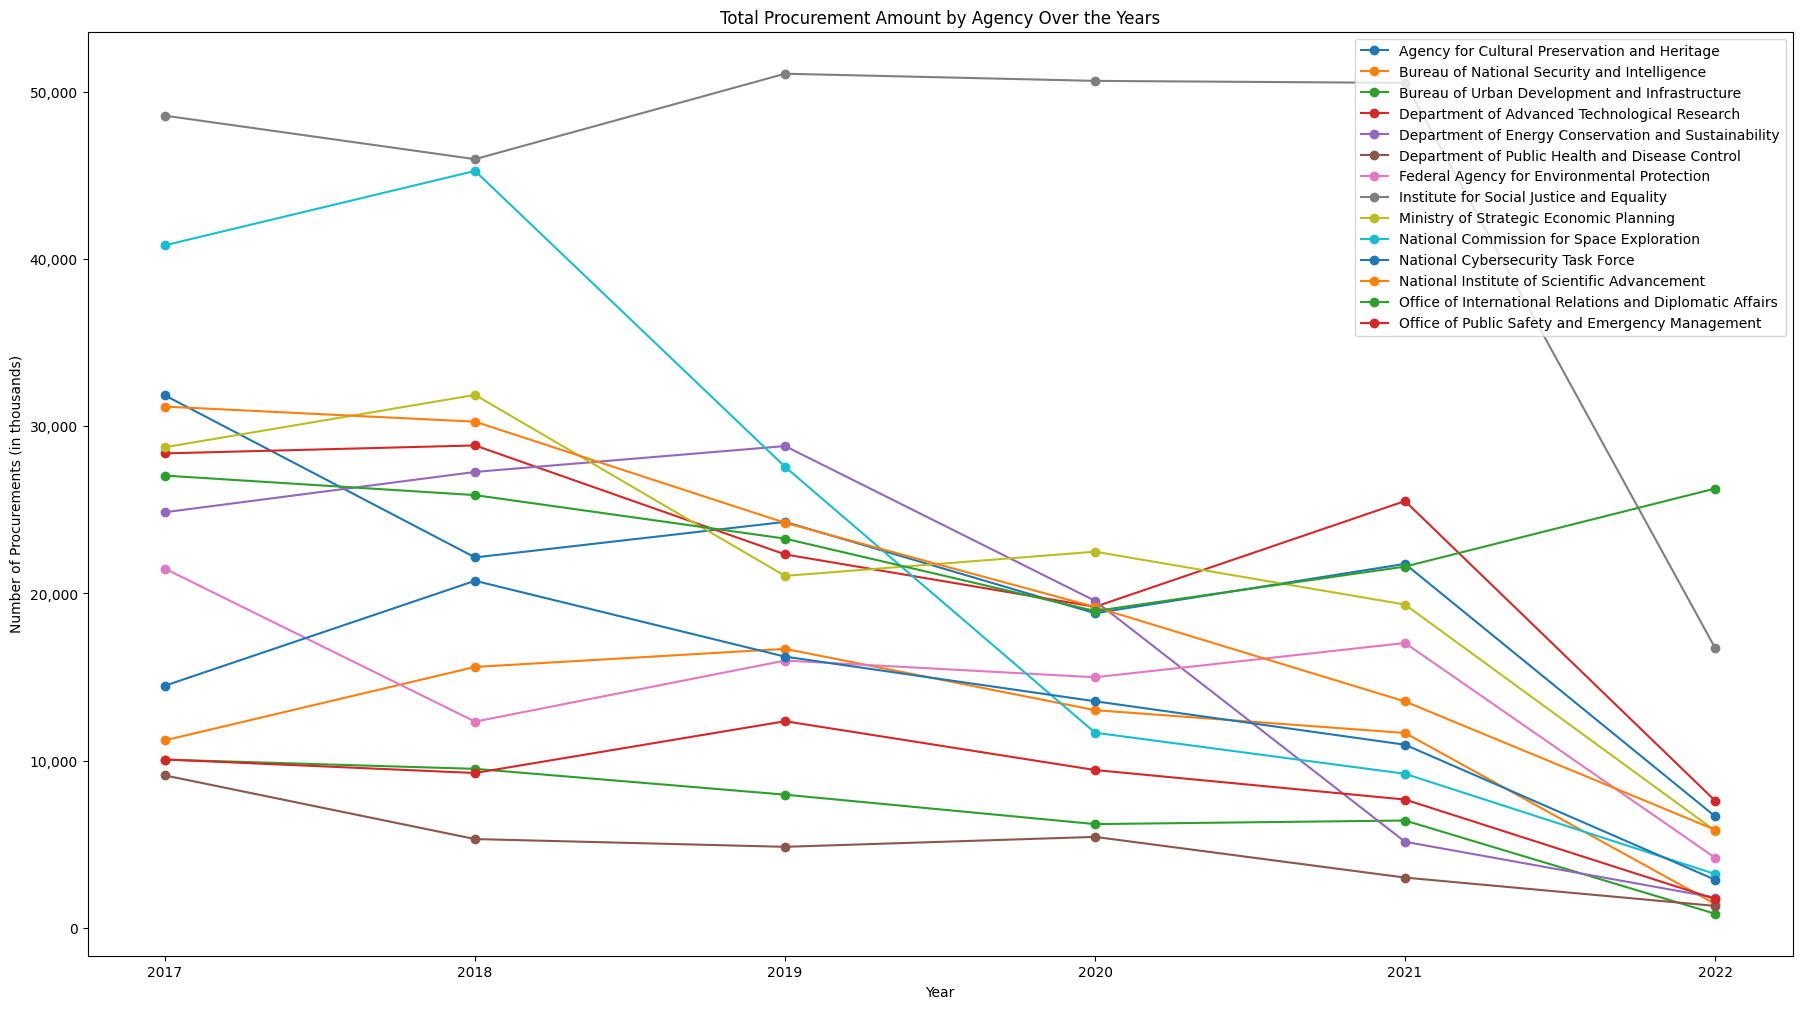

In [82]:
plt.figure(figsize=(22, 12))

# Extract the year from the date

# data = data[data["Agency"] != "Commission for Ethical Governance"]
data['Year'] = data['Date of Award (2017-2022)'].dt.year
print(data['Year'])
# Convert the "Awarded Amount" column to numeric
data['Awarded Amount'] = pd.to_numeric(data['Awarded Amount'], errors='coerce')

# Group the data by Agency and Year, then sum the awarded amounts
agency_yearly_total = data.groupby(['Agency', 'Year'])['Awarded Amount'].sum().reset_index()

# Create a plot for each agency
plt.figure(figsize=(22, 12))
for agency in agency_yearly_total['Agency'].unique():
    agency_data = agency_yearly_total[agency_yearly_total['Agency'] == agency]
    plt.plot(agency_data['Year'], agency_data['Awarded Amount'], label=agency, marker="o")

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Procurements (in thousands)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x / 1000)))

plt.title('Total Procurement Amount by Agency Over the Years')
plt.legend()

# Show the plot
plt.show()

In [68]:
print(data["Date of Award (2017-2022)"])

1      2017-01-01
2      2017-05-01
3      2017-08-01
4      2017-12-01
5      2017-12-01
          ...    
6993   2022-12-13
6994   2022-12-16
6995   2022-12-28
6996   2022-12-29
6997   2022-12-29
Name: Date of Award (2017-2022), Length: 6997, dtype: datetime64[ns]


## Visualisation of year over year change in procurement frequency